In [6]:
%run imports.py

Succesfully imported libraries and modules



In [7]:
p3 = load_patient(3, load_pac=False)

Patient directory:  D:\LAB\AlexPAC\data\Patient3


In [10]:
p3 = copy_patient(p3)
p3.load_all_pacs(verbose=False)

List of things to make sure before analysis: 
1) .bdf files are in patient folder (root_dir)
2) annotation files share the same name as .bdf files but with _annotations.txt suffix
3) annotations share the same naming principle: e.g. 1Day OFF RH (Com)


## Day 1 OFF vs ON

In [29]:
%matplotlib inline
plt.ioff()

from itertools import combinations
patient = p3


sns.set(context='notebook')

conditions = ["1Day OFF Rest 180sec", "1Day ON Rest 180sec"]
placements = patient.sorted_placements
folder = os.path.join(patient.root_dir, "im", "1dayOFFvsON_cross_pac")
try:
    os.mkdir(folder)
except:
    pass

counter = 0
for pi, pj in tqdm(combinations(placements, 2)):
    
        if not pac_exists(patient, conditions[0], pi, pj):
                continue
        if not pac_exists(patient, conditions[0], pj, pi):
                continue      
                
        fig, axes = plt.subplots(2, 2, figsize=(11, 8))
        for j, condition in enumerate(conditions):
            
            phase, amplitude = pi, pj
            pac = patient.pac[condition][phase][amplitude]
            ax = axes[0, j]
            title = "PAC; " + condition[:-7] + '; p-' + phase + ' a-' + amplitude  # without 180sec
            ax.set_title(title)
            #lfp.show_psd()
            im = comodulogram(pac.pac_matrix.copy(), 
                         pac.beta_params, 
                         pac.hfo_params, 
                         pvalues=pac.pvalues, 
                         significant=True, significance=0.01,
                         vmax=0.00025, smooth=True,
                         ax=ax)
            ax.set_xlabel(r"$f_p$, Hz")
            ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
            cbar = fig.colorbar(im, ax=ax)
            cbar.formatter.set_powerlimits((0, 0))
            ax.grid()
            
            """ Switched phase and amplitude"""
            phase, amplitude = pj, pi
            pac = patient.pac[condition][phase][amplitude]
            ax = axes[1, j]
            title = "PAC; " + condition[:-7] + '; p-' + phase + ' a-' + amplitude  # without 180sec
            ax.set_title(title)
            #lfp.show_psd()
            im = comodulogram(pac.pac_matrix.copy(), 
                         pac.beta_params, 
                         pac.hfo_params, 
                         pvalues=pac.pvalues, 
                         significant=True, significance=0.01,
                         vmax=0.00025, smooth=True,
                         ax=ax)
            ax.set_xlabel(r"$f_p$, Hz")
            ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
            cbar = fig.colorbar(im, ax=ax)
            cbar.formatter.set_powerlimits((0, 0))
            ax.grid()
            
            
        plt.tight_layout()
        counter += 1
        number = str(counter//100) + str(counter//10) + str(counter % 10)
        fig_name = f"{number}.P{patient.name[-1]}_PAC_OFFvsON_{phase}_a-{amplitude}.png"
        #plt.savefig(os.path.join(patient.root_dir, "im", folder, fig_name));
        plt.close(fig)

0it [00:00, ?it/s]

## 5Day OFF vs ON

In [30]:
from itertools import combinations
patient = p3

%matplotlib inline
sns.set(context='notebook')

conditions = ["5Day OFF Rest 180sec", "5Day ON Rest 180sec"]
placements = patient.sorted_placements
folder = os.path.join(patient.root_dir, "im", "5dayOFFvsON_cross_pac")
try:
    os.mkdir(folder)
except:
    pass

counter = 0
for pi, pj in tqdm(combinations(placements, 2)):
    
        if not pac_exists(patient, conditions[0], pi, pj):
                continue
        if not pac_exists(patient, conditions[0], pj, pi):
                continue      
                
        fig, axes = plt.subplots(2, 2, figsize=(11, 8))
        for j, condition in enumerate(conditions):
            
            phase, amplitude = pi, pj
            pac = patient.pac[condition][phase][amplitude]
            ax = axes[0, j]
            title = "PAC; " + condition[:-7] + '; p-' + phase + ' a-' + amplitude  # without 180sec
            ax.set_title(title)
            #lfp.show_psd()
            im = comodulogram(pac.pac_matrix.copy(), 
                         pac.beta_params, 
                         pac.hfo_params, 
                         pvalues=pac.pvalues, 
                         significant=True, significance=0.01,
                         vmax=0.00025, smooth=True,
                         ax=ax)
            ax.set_xlabel(r"$f_p$, Hz")
            ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
            cbar = fig.colorbar(im, ax=ax)
            cbar.formatter.set_powerlimits((0, 0))
            ax.grid()
            
            """ Switched phase and amplitude"""
            phase, amplitude = pj, pi
            pac = patient.pac[condition][phase][amplitude]
            ax = axes[1, j]
            title = "PAC; " + condition[:-7] + '; p-' + phase + ' a-' + amplitude  # without 180sec
            ax.set_title(title)
            #lfp.show_psd()
            im = comodulogram(pac.pac_matrix.copy(), 
                         pac.beta_params, 
                         pac.hfo_params, 
                         pvalues=pac.pvalues, 
                         significant=True, significance=0.01,
                         vmax=0.00025, smooth=True,
                         ax=ax)
            ax.set_xlabel(r"$f_p$, Hz")
            ax.set_ylabel(r"$f_A$, Hz", rotation=0, labelpad=20)
            cbar = fig.colorbar(im, ax=ax)
            cbar.formatter.set_powerlimits((0, 0))
            ax.grid()
            
            
        plt.tight_layout()
        counter += 1
        number = str(counter//100) + str(counter//10) + str(counter % 10)
        fig_name = f"{number}.P{patient.name[-1]}_PAC_OFFvsON_{phase}_a-{amplitude}.png"
        plt.savefig(os.path.join(patient.root_dir, "im", folder, fig_name));
        plt.close(fig)

0it [00:00, ?it/s]

## Computing matrix norm

In [122]:
def compute_matrix_norm(matrix, norm='p', p=2):
    if norm == 'max':
        return np.max(np.max(matrix))
    if norm == 'p':
        return np.sum(np.sum(matrix ** p)) ** (1/p)

In [48]:
x = np.arange(8)
mask = np.arange(8) < 6

np.sum(np.ma.masked_array(x, mask))

13

In [49]:
print(np.ma.masked_array(x, mask))

[-- -- -- -- -- -- 6 7]


In [41]:
compute_matrix_norm(pac)

0.0005894232854696828

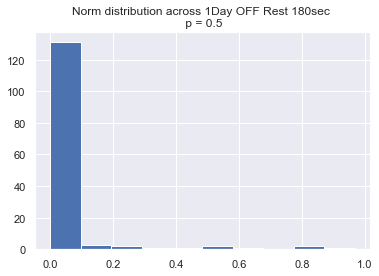

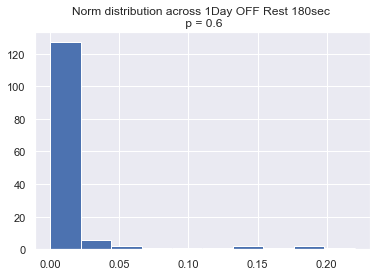

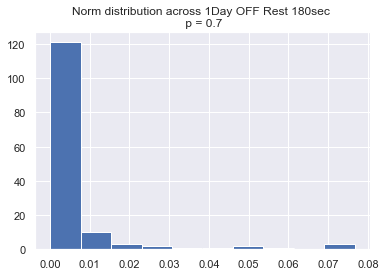

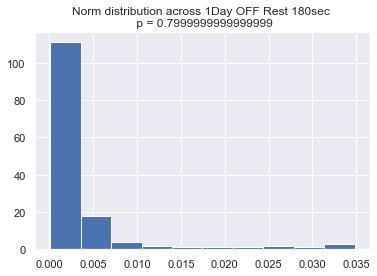

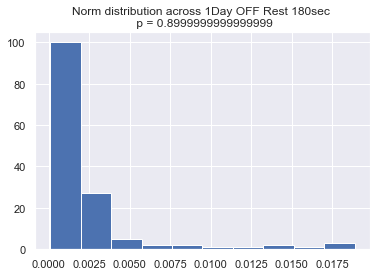

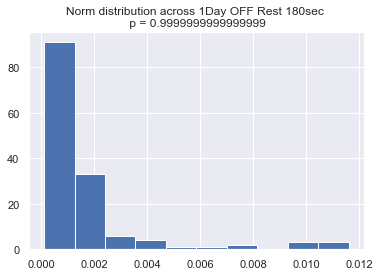

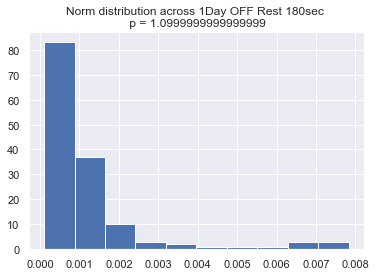

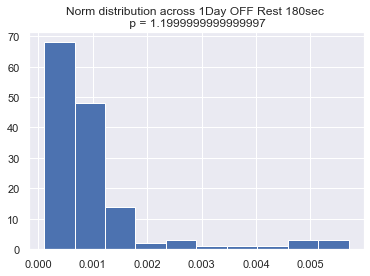

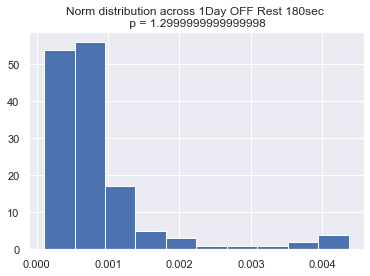

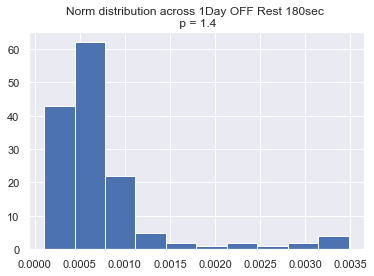

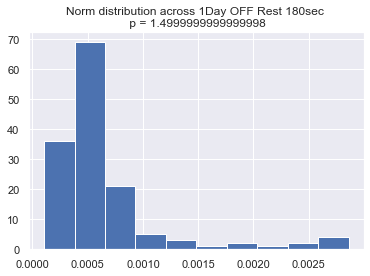

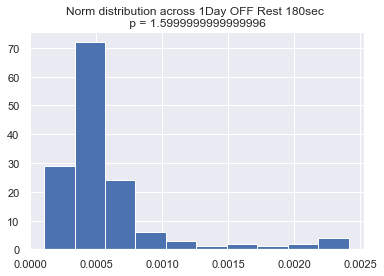

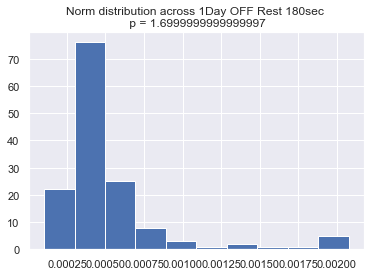

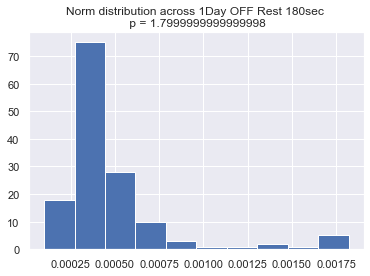

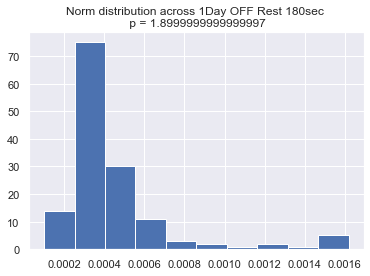

In [100]:

patient = p3
condition = "1Day OFF Rest 180sec" # OFF

for p in np.arange(0.5, 2., 0.1):
    norms = []
    for pi, pj in combinations(placements, 2):


        if not pac_exists(patient, condition, pi, pj):
                continue
        if not pac_exists(patient, condition, pj, pi):
                continue

    #pi, pj = "R1-2C", "R4-3B"
        pac = patient.pac[condition][pi][pj]
        norm = compute_matrix_norm(pac, 'p', p)
        #print(f"{pi}->{pj}: {norm * 1e4:.1f}")
        norms.append(norm)
        pac = patient.pac[condition][pj][pi]
        norm = compute_matrix_norm(pac, 'p', p)
        #print(f"{pj}->{pi}: {norm * 1e4:.1f}")
        norms.append(norm)
    plt.title(f"Norm distribution across {condition} \n p = {p}")
    plt.hist(norms)
    plt.show()

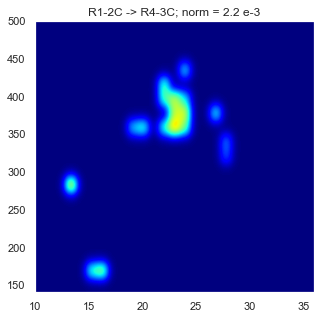

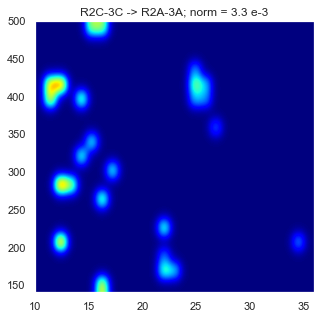

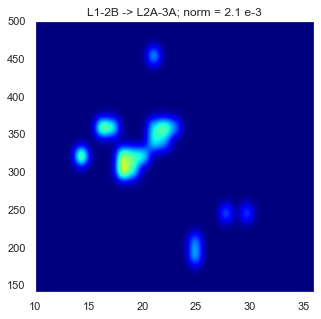

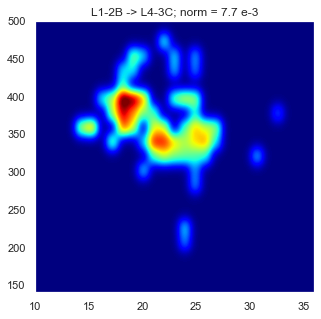

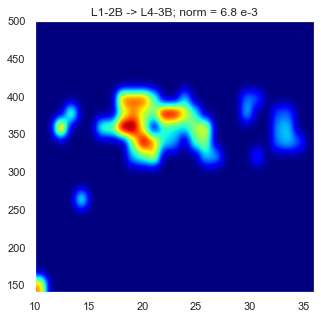

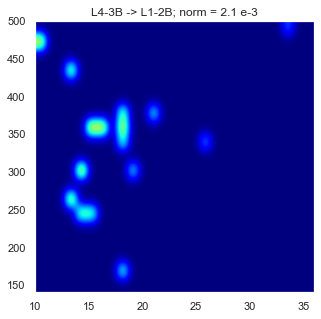

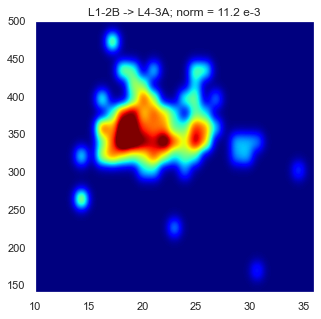

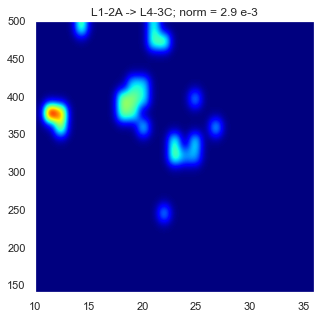

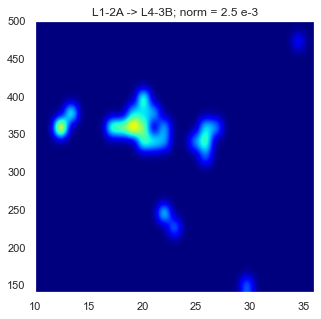

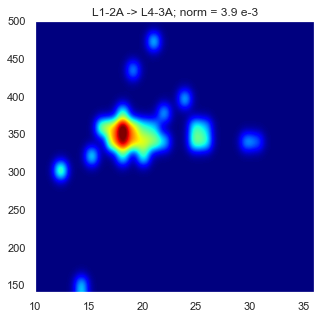

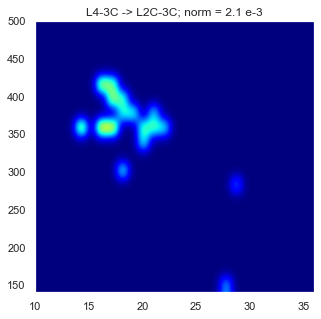

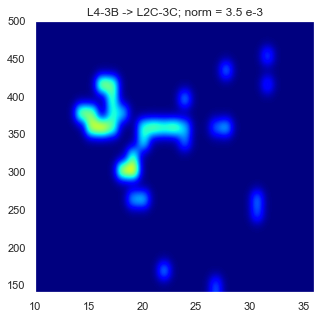

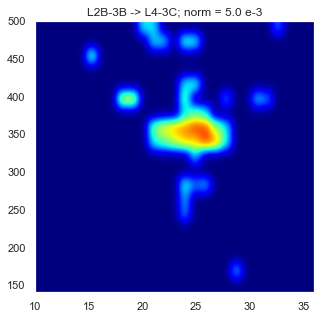

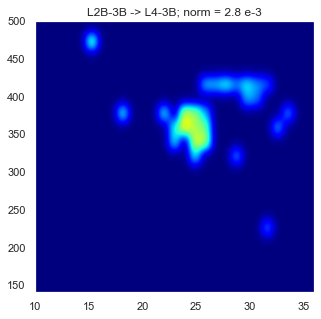

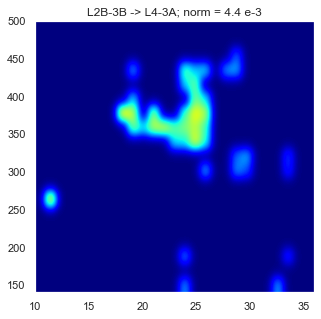

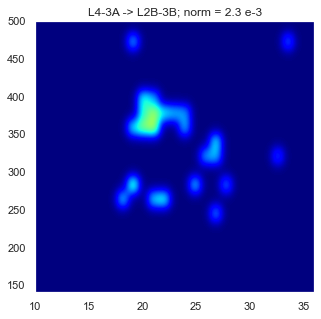

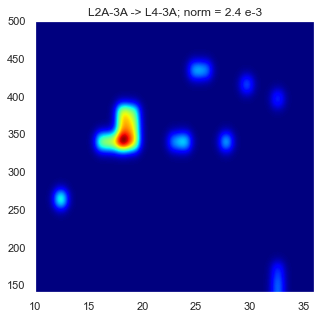

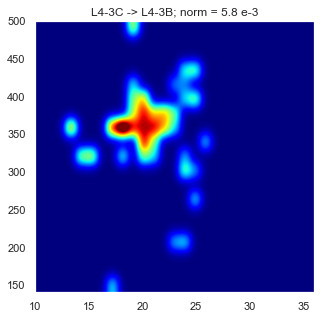

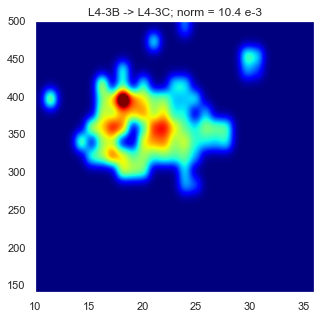

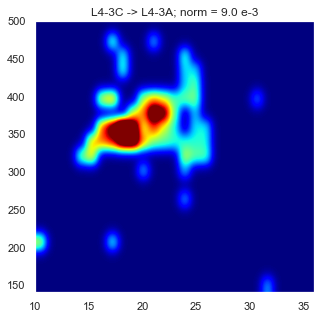

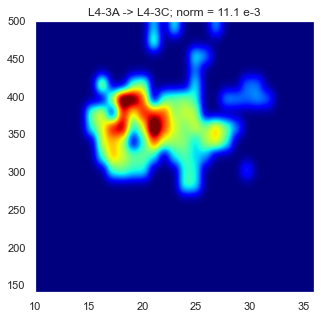

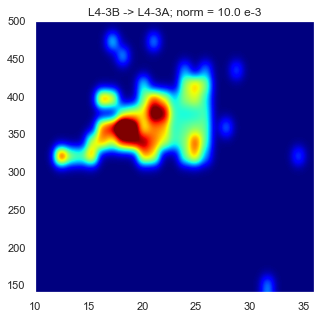

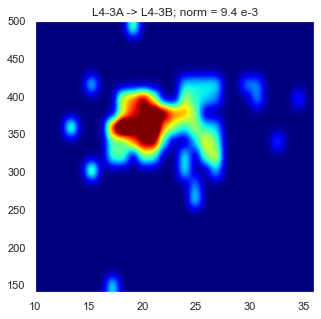

In [110]:
p = 0.9
threshold = 2e-3

for pi, pj in combinations(placements, 2):
    
        if not pac_exists(patient, condition, pi, pj):
                continue
        if not pac_exists(patient, condition, pj, pi):
                continue
        for pp, pa in [(pi, pj), (pj, pi)]:
            pac = patient.pac[condition][pp][pa]
            norm = compute_matrix_norm(pac, 'p', p)
            if norm > threshold:
                plt.figure(figsize=(5, 5))
                plt.title(f"{pp} -> {pa}; norm = {norm * 1000:.1f} e-3")
                comodulogram(pac.pac_matrix, pac.beta_params, pac.hfo_params, pac.pvalues, significant=True, vmax=0.00025)
                plt.grid()
                plt.show()

In [101]:
len(norms)

144

## Mask non-clustered function

In [129]:
def mask_nonclustered(sig_pac, mode='single', min_cluster_size=3):
    """
    Takes significant pac_matrix 
    Returns pac_matrix with non-clustered (presumably spurious) pac values zeroed out
    modes: 'single' (equivalent to min_cluster_size=2)
           'cluster' with min_cluster_size
    """
    n, m = sig_pac.shape
    is_alone = np.ones_like(sig_pac, dtype=bool)
    for i in range(n):
        for j in range(m):
            # for each non-zero element check if its neighbours are 0 or not
            # skipping those who are already checked as not alone
            if sig_pac[i, j] > 0 and is_alone[i, j]:
                neighbours = [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)]
                for ii, jj in neighbours:
                    # checking borders
                    if (0 <= ii <= n-1) and (0 <= jj <= m-1):
                        # checking if neighbour is non zero and is marked as alone
                        if sig_pac[ii, jj] > 0:
                        # marking both as not alone (both have at least one neighbour)
                            is_alone[i, j] = False
                            is_alone[ii, jj] = False
                            continue
                # if all neighbours are zero - leaving it as "alone"
    
    sig_pac[is_alone] = 0
    return sig_pac




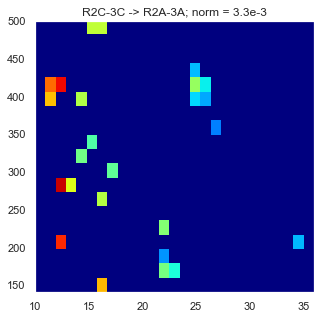

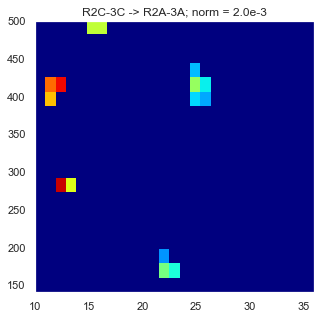

In [130]:
pp, pa = "R2C-3C", "R2A-3A"

pac = patient.pac[condition][pp][pa]

sig_pac = pac.pac_matrix.copy()
sig_pac[pac.pvalues > 0.01] = 0

norm = compute_matrix_norm(sig_pac, 'p', p)
plt.figure(figsize=(5, 5))
plt.title(f"{pp} -> {pa}; norm = {norm * 1000:.1f}e-3")
comodulogram(pac.pac_matrix, pac.beta_params, pac.hfo_params, pac.pvalues, significant=True, vmax=0.00025, smooth=False)
plt.grid()
plt.show()

sig_pac = pac.pac_matrix.copy()
sig_pac[pac.pvalues > 0.01] = 0
sig_pac = mask_nonclustered(sig_pac)

norm = compute_matrix_norm(sig_pac, 'p', p)

plt.figure(figsize=(5, 5))
plt.title(f"{pp} -> {pa}; norm = {norm * 1000:.1f}e-3")
comodulogram(sig_pac, pac.beta_params, pac.hfo_params, pac.pvalues, significant=True, vmax=0.00025, smooth=False)
plt.grid()
plt.show()

## Bipartate Graph

In [132]:
def get_sig_pac(pac, significance=0.01, mask_lonely=True):
    sig_pac = pac.pac_matrix.copy()
    sig_pac[pac.pvalues > significance] = 0
    if mask_lonely:
        sig_pac = mask_nonclustered(sig_pac)
    return sig_pac

In [248]:
def get_bigraph(patient, condition, norm_type='p', p=0.9, norm_threshold=2e-3, ):
    
    # 1. Initialize parameters
    cross_placements = ["L4-3A", "L4-3B", "L4-3C", "L2A-3A", "L2B-3B", "L2C-3C", "L1-2A", "L1-2B", "L1-2C", 
                        "R4-3A", "R4-3B", "R4-3C", "R2A-3A", "R2B-3B", "R2C-3C", "R1-2A", "R1-2B", "R1-2C"]
    n = len(cross_placements)
    adjacency_matrix = np.zeros(shape=(n, n))
    
    # 2. Compute adjacency matrix
    for i in range(n):
        for j in range(n):
            phase = cross_placements[i]
            amplitude = cross_placements[j]
            if not pac_exists(patient, condition, phase, amplitude):
                    continue
            if not pac_exists(patient, condition, phase, amplitude):
                    continue
            pac = patient.pac[condition][phase][amplitude]
            
            # getting only significant PAC + leaving only "clustered" entries
            sig_pac = get_sig_pac(pac, significance=0.01, mask_lonely=True)
            norm = compute_matrix_norm(sig_pac, norm=norm_type, p=p)
            if norm > norm_threshold:
                adjacency_matrix[i, j] = np.round(norm * 1e3, 2)
    
    # 3. Initialize graph and nodes
    G = nx.DiGraph()

    nodes_left = [node + '-p' for node in nodes]
    nodes_right = [node + '-a' for node in nodes]
    
    
    G.add_nodes_from(nodes_left, bipartite=0)
    G.add_nodes_from(nodes_right, bipartite=1)
    
    # 4. Add edges from adjacency matrix
    for i in range(n_electrodes):
        for j in range(n_electrodes):
            weight = adjacency_matrix[i, j]
            if weight != 0:
                G.add_edge(nodes_left[i], nodes_right[j], weight=weight)
                
    return G

    
def draw_bigraph(G, ax):
    # get node names
    nodes_left = [node + '-p' for node in nodes]
    nodes_right = [node + '-a' for node in nodes]
    
    # get node positions
    pos_y = np.concatenate((- np.linspace(-0.75, -0.1, n // 2), - np.linspace(0.1, 0.75, n // 2))).reshape(-1, 1)
    pos_left = np.hstack((-1 * np.ones((n, 1)), pos_y))
    pos_right = np.hstack((1 * np.ones((n, 1)), pos_y)) 

    positions_left = {node:position for node, position in zip(nodes_left, pos_left)}
    positions_right = {node:position for node, position in zip(nodes_right, pos_right)}

    pos = {**positions_left, **positions_right}
    
    weights = np.array([G[u][v]['weight'] for u,v in G.edges()])

    nx.draw_networkx(G, pos = pos, arrows=False, width=weights / 10, ax=ax)

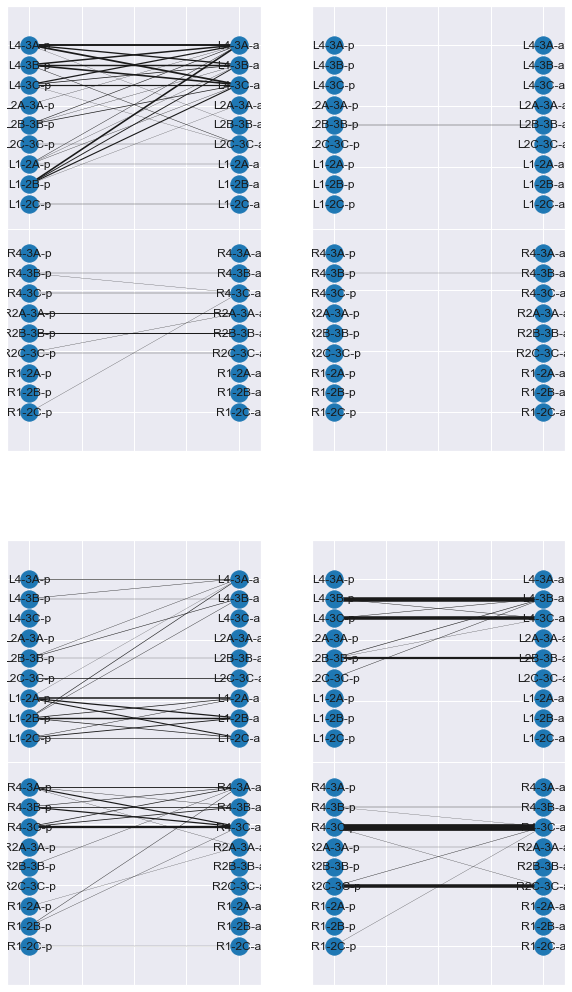

In [252]:
patient = p3
conditions_1day = ["1Day OFF Rest 180sec", "1Day ON Rest 180sec"]

fig, axes = plt.subplots(2, 2, figsize=(10, 18), sharey=True)
norm_treshold = 1e-3


for i, condition in enumerate(conditions_1day):
    G = get_bigraph(patient, condition, norm_threshold=norm_threshold)
    draw_bigraph(G, ax=axes[0, i])
    
conditions_5day = ["5Day OFF Rest 180sec", "5Day ON Rest 180sec"]

for i, condition in enumerate(conditions_5day):
    G = get_bigraph(patient, condition, norm_threshold=norm_threshold)
    draw_bigraph(G, ax=axes[1, i])

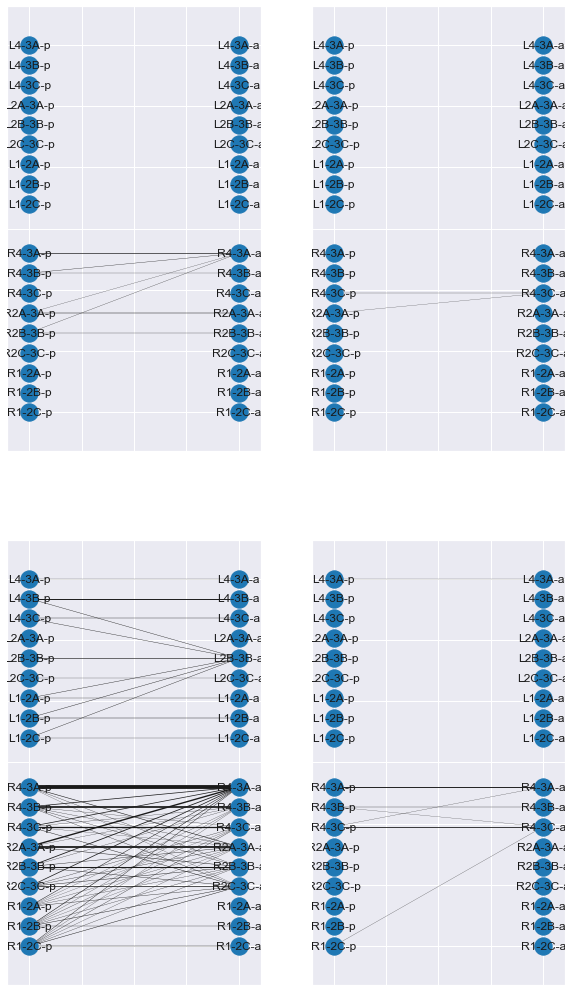

In [251]:
#p1 = load_patient(1)
patient = p1
conditions_1day = ["1Day OFF Rest 180sec", "1Day ON Rest 180sec"]

fig, axes = plt.subplots(2, 2, figsize=(10, 18), sharey=True)

for i, condition in enumerate(conditions_1day):
    G = get_bigraph(patient, condition, norm_threshold=norm_threshold)
    draw_bigraph(G, ax=axes[0, i])
    
conditions_5day = ["5Day OFF Rest 180sec", "5Day ON Rest 180sec"]

for i, condition in enumerate(conditions_5day):
    G = get_bigraph(patient, condition, norm_threshold=norm_threshold)
    draw_bigraph(G, ax=axes[1, i])
    
plt.suptitle(f"{patient.name}; Day 1; OFF (left) vs ON (right)")